# TSP
### 都市の位置を乱数で生成

In [1]:
import numpy as np


def gen_random_tsp(ncity: int):
    # 座標
    locations = np.random.uniform(size=(ncity, 2))

    # 距離行列
    all_diffs = np.expand_dims(locations, axis=1) - np.expand_dims(locations, axis=0)
    distances = np.sqrt(np.sum(all_diffs ** 2, axis=-1))

    return locations, distances

### 都市のプロット

In [11]:
import matplotlib.pyplot as plt


def show_plot(locs: np.ndarray):
    plt.figure(figsize=(7, 7))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.scatter(*zip(*locations))
    plt.show()


# 都市数
ncity = 4
locations, distances = gen_random_tsp(ncity)

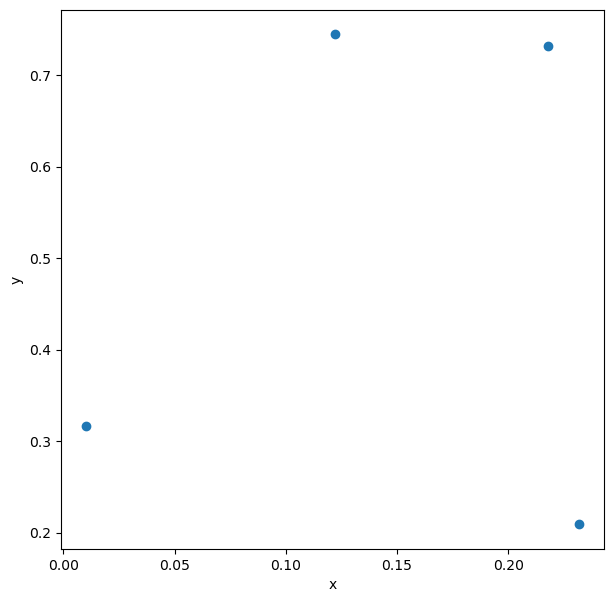

In [12]:
show_plot(locations)

### 決定変数生成
２値変数 $q_{n,i}$ : $n$ 順番のインデックス、$i$ 都市のインデックス

In [13]:
from amplify import BinarySymbolGenerator

gen = BinarySymbolGenerator()
# ２値変数 q_{i,j} : 都市 i から都市 j への経路を選択するとき 1
q = gen.array(ncity, ncity)

### コスト関数
都市 $i$ と都市 $j$ の距離を $d_{ij}$、都市数を $N$ として、
$$
 \sum_{n=0}^{N-1} \sum_{i=0}^{N-1} \sum_{j=0}^{N-1} d_{ij} q_{n,i} q_{n+1,j}
$$

In [16]:
from amplify import sum_poly

cost = sum_poly(
    ncity,
    lambda n: sum_poly(
        ncity,
        lambda i: sum_poly(
            ncity, lambda j: distances[i, j] * q[n, i] * q[(n + 1) % ncity, j]
        ),
    ),
)

### イジングモデル生成

In [24]:
model = cost

### ソルバの実行

In [25]:
from amplify import Solver
from amplify.client import FixstarsClient

client = FixstarsClient()
client.token = "rSnIw4H95J8GuAKbvPxzG2PMOCCcFoZD"  #2022-11-27まで有効
client.parameters.timeout = 1000  # タイムアウト1秒

solver = Solver(client)

In [37]:
result = solver.solve(model)
if len(result) == 0:
    raise RuntimeError("Any one of constraints is not satisfied.")

energy = result[0].energy
values = result[0].values

print('energy = ',energy)

q_values = q.decode(values)

print('q_values = ',q_values)
route = np.where(np.array(q_values) == 1)[1]

energy =  0.0
q_values =  [[0. 0. 0. 0.]
 [1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]]


### 経路のプロット

In [29]:
def show_route(route: list, distances: np.ndarray, locations: np.ndarray):

    ncity = len(route)
    path_length = sum(
        [distances[route[i]][route[(i + 1) % ncity]] for i in range(ncity)]
    )

    x = [i[0] for i in locations]
    y = [i[1] for i in locations]
    plt.figure(figsize=(7, 7))
    plt.title(f"path length: {path_length}")
    plt.xlabel("x")
    plt.ylabel("y")

    for i in range(ncity):
        r = route[i]
        n = route[(i + 1) % ncity]
        plt.plot([x[r], x[n]], [y[r], y[n]], "b-")
    plt.plot(x, y, "ro")
    plt.show()

    return path_length

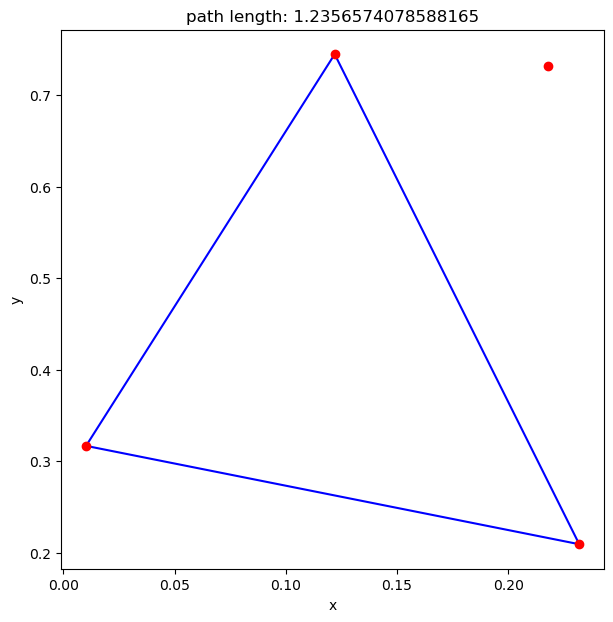

1.2356574078588165

In [31]:
show_route(route, distances, locations)